In [2]:
# Import necessary Libraries
# Image downloaded from https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings(action='once')

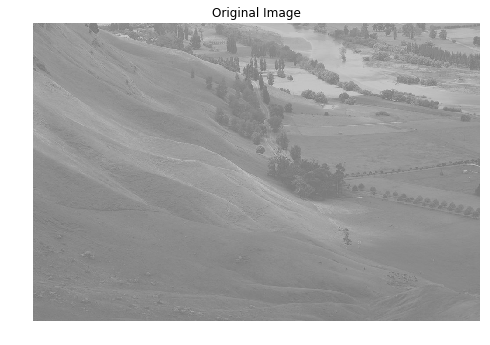

In [23]:
# show the original image
image = plt.imread('img.jpg')
plt.figure(figsize=(8,6));
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

C:\Users\budha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


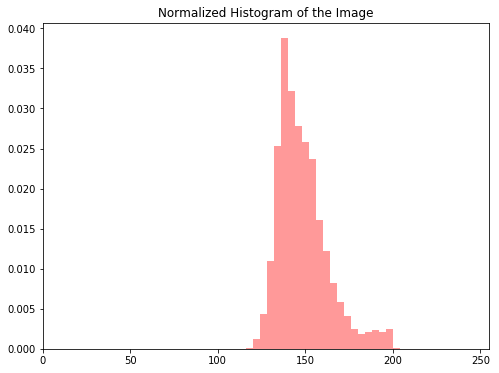

In [22]:
# lets flatten the image into a 1D image and display the normalized histogram of the flattened image
one_d_image = image.flatten()
plt.figure(figsize=(8,6));
plt.title('Normalized Histogram of the Image');
plt.xlim(0,255);
plt.hist(one_d_image, bins = 64, range=(0,256), normed=True, color ='red', alpha=0.4);
plt.show();

C:\Users\budha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


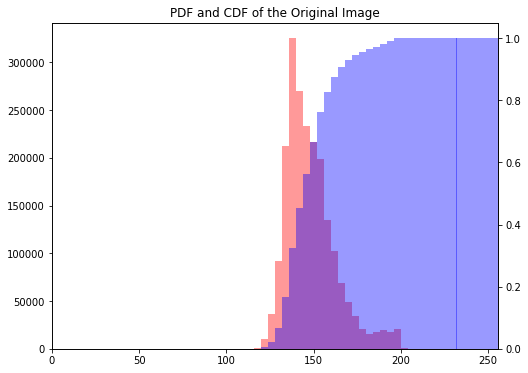

In [21]:
# Now lets try to plot and see the PDF and CDF of the pixel intensities
plt.figure(figsize=(8,6));
pdf = plt.hist(one_d_image, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
#plt.grid('off')
plt.twinx()

cdf = plt.hist(one_d_image, bins=64, range=(0,256), normed=True, cumulative=True, color='blue', alpha = 0.4)
plt.xlim((0,256))
#plt.grid('off')
plt.title('PDF and CDF of the Original Image')
plt.show()

Now lets use Histogram Equalization procedure to process the image. Basically, I'm trying to use Interpolation technique to map the original CDF of pixel intensities to a CDF that is almost a straight line. So that the pixel intensities are spread out makes the image sharper and contrast-enhanced.

C:\Users\budha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


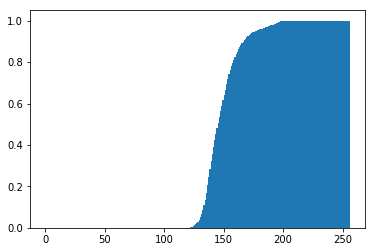

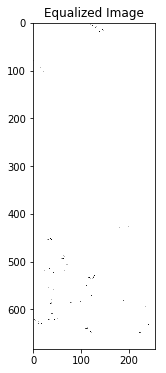

In [26]:
# lets try to generate a Cumulative Histogram

cdf, bins, patches = plt.hist(one_d_image, bins=256, range=(0,256), normed=True, cumulative=True)
new_image_one_d = np.interp(one_d_image, bins[:-1], cdf*255)

# reshaping new_image_one_d as a 2D array with the shape of the original image
new_image = new_image_one_d.reshape(image.shape)

#Now lets plot and display the new image in gray color map
plt.figure(figsize=(8,6));
plt.imshow(new_image, cmap='gray');
plt.title('Equalized Image');
plt.xlim((0,256));
plt.show();